In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#pre-processing

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [86]:
df = pd.read_csv('/Users/alyaamrina/Desktop/Work/Streamlit_App/Employee_Retention/cleanedemployee.csv')

In [87]:
df_copy = df.copy()

In [88]:
df.head()

,dept,Month of resignation,age_group,POSTDIC SCORE 2021,postdic,promoted,travel,distance,marital,edu,grad,Status,age_left,age_joined,duration,salary,experience
0,FINANCE,8.0,30-34,3.0 - 3.9 [Good Work Attitude],NOT APPLICABLE,NO,YES,22.0,Married,PC,L,left,31.0,29,29,6800.00,8.0
1,DIGITAL MARKETING,8.0,35-39,NOT APPLICABLE,NOT APPLICABLE,NO,NO,36.0,Married,STP,L,left,35.0,32,43,2713.33,6.0
2,CREATIVE,NaN,30-34,1.1 - 2.9 [Req Imp],3.0 - 3.9 [Good Work Attitude],NO,NO,28.0,Married,Dg,L,stay,34.0,27,79,8910.00,13.0
3,CREATIVE,NaN,30-34,3.0 - 3.9 [Good Work Attitude],Above 4.0 [Positive Influence],NO,NO,36.0,Married,Dip,L,stay,32.0,25,79,4010.00,10.0
4,CALL CENTRE,NaN,30-34,3.0 - 3.9 [Good Work Attitude],1.1 - 2.9 [Req Imp],NO,NO,35.0,Married,Dip,L,stay,34.0,27,79,7100.00,13.0


In [89]:
df.isna().sum()

dept                      0
Month of resignation    102
age_group                 0
POSTDIC SCORE 2021        0
postdic                   0
promoted                  0
travel                    0
distance                  0
marital                   0
edu                       0
grad                      0
Status                    0
age_left                  0
age_joined                0
duration                  0
salary                    0
experience                0
dtype: int64

## Feature Engineering

In [90]:
#encoding categorical varible

department_map = {"ANALYTICS" : 0, "CALL CENTRE" : 1, "COMMERCIAL" : 2, 
                  "CORPORATE SERVICES" : 3, "CREATIVE" : 4, "DIGITAL MARKETING" : 5, 
                  "FINANCE" : 6, "PRODUCTS" : 7, "SYSTEM" : 8, "TALENT MANAGEMENT" : 9}

postdic_map = {'NOT APPLICABLE': 0, '1.1 - 2.9 [Req Imp]': 1, '3.0 - 3.9 [Good Work Attitude]':2, 'Above 4.0 [Positive Influence]':3}

business_travel_map = {'YES': 1, 'NO': 0}

married_map = {'Single': 0, 'Married': 1, 'Divorce':2, 'Widow': 3}

target_map = {'stay': 0, 'left':1}

promotion_map = {'YES':1, 'NO': 0}

age_map = {'20-24' : 0, '25-29' : 1, '30-34' : 2, '35-39' : 3, '40-44' : 4,  '45-49' : 5, '50-54': 6, '55-59' : 7}

edu_map = {'HS': 0, 'STP': 1, 'Cert': 2, 'Sijil' : 3, 'Dip': 4, 'Dg': 5, 'M': 6, 'P': 7, 'PC': 8}

localoverseas_map = {'L': 0, 'O':1}



# Map values to columns using the map() function
df['dept'] = df['dept'].map(department_map)
df['POSTDIC SCORE 2021'] = df['POSTDIC SCORE 2021'].map(postdic_map)
df['postdic'] = df['postdic'].map(postdic_map)
df['travel'] = df['travel'].map(business_travel_map)
df['marital'] = df['marital'].map(married_map)
df['Status'] =df['Status'].map(target_map)
df['promoted'] =df['promoted'].map(promotion_map)
df['age_group'] =df['age_group'].map(age_map)
df['edu'] =df['edu'].map(edu_map)
df['grad'] =df['grad'].map(localoverseas_map)


In [91]:
df.dtypes

dept                      int64
Month of resignation    float64
age_group                 int64
POSTDIC SCORE 2021        int64
postdic                   int64
promoted                  int64
travel                    int64
distance                float64
marital                   int64
edu                       int64
grad                      int64
Status                    int64
age_left                float64
age_joined                int64
duration                  int64
salary                  float64
experience              float64
dtype: object

In [92]:
df['distance'] = df['distance'].astype(int)
df['age_left'] = df['age_left'].astype(int)
df['salary'] = df['salary'].astype(int)
df['experience'] = df['experience'].astype(int)

## Train Test Split

In [93]:
df.columns

Index(['dept', 'Month of resignation', 'age_group', 'POSTDIC SCORE 2021',
       'postdic', 'promoted', 'travel', 'distance', 'marital', 'edu', 'grad',
       'Status', 'age_left', 'age_joined', 'duration', 'salary', 'experience'],
      dtype='object')

In [94]:
df = df[['dept', 'age_group', 'postdic', 'promoted', 'travel', 'distance', 'marital', 'edu', 'grad', 'age_joined', 'age_left', 'duration', 'salary', 'experience', 'Status']]

In [95]:
#Assign input and output
x = df.drop(['Status'], axis = 1)
y = df['Status']

In [96]:
x.columns

Index(['dept', 'age_group', 'postdic', 'promoted', 'travel', 'distance',
       'marital', 'edu', 'grad', 'age_joined', 'age_left', 'duration',
       'salary', 'experience'],
      dtype='object')

##Logistic Regression Model

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform the training features
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the stratified k-fold object
stf_kf = StratifiedKFold(n_splits=5)

# Initialize the logistic regression classifier pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('logistic', LogisticRegression(max_iter=1000, n_jobs=-1))  # LogisticRegression as the second step
])

# Define the hyperparameter search space
params = {
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': np.logspace(-3, 3, 7),
    'logistic__solver': ['liblinear', 'saga']
}

# Initialize the randomized search cross-validator
rs_cv_classifier = RandomizedSearchCV(
    pipeline,
    param_distributions=params,
    cv=stf_kf,
    n_jobs=-1,
    scoring='accuracy',
    random_state=40
)

# Fit the model to the training data
rs_cv_classifier.fit(X_train, y_train)

# Obtain the predicted probabilities for each class on the test set
probs = rs_cv_classifier.predict_proba(X_test)

# Define a range of threshold values to try
thresholds = np.arange(0.40, 0.81, 0.01)

# Initialize variables to store the best threshold and best accuracy score
best_threshold = None
best_score = 0

# Iterate over the threshold values and evaluate the model's performance
for threshold in thresholds:
    preds = (probs[:, 1] > threshold).astype(int)
    score = accuracy_score(y_test, preds)
    if score > best_score:
        best_threshold = threshold
        best_score = score

# Use the best threshold to predict the test set and evaluate the model's performance
preds = (rs_cv_classifier.predict_proba(X_test)[:, 1] > best_threshold).astype(int)

print("Best threshold: ", best_threshold)
print("Best Parameter: \n", rs_cv_classifier.best_params_)
print("Logistic Regression Acc Score: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any

Best threshold:  0.6600000000000003
Best Parameter: 
 {'logistic__solver': 'saga', 'logistic__penalty': 'l2', 'logistic__C': 10.0}
Logistic Regression Acc Score:  0.7857142857142857
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.85      0.74      0.79        23

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alyaamrina/.local/lib/python3.9/site-packages/sklearn

### Predict_Proba

In [100]:
predicted_df = pd.DataFrame({
    'Status': y_test,     # Actual target variable values (ground truth)
    'Predicted_Probability_Class1': probs[:, 1],  # Predicted probabilities for class 1
    'Predicted_Class': rs_cv_classifier.predict(X_test)      # Predicted class labels (0 or 1)
})

predicted_df.head()

,Status,Predicted_Probability_Class1,Predicted_Class
30,1,0.989297,1
172,1,0.198222,0
84,1,0.973833,1
199,0,0.615211,1
60,1,0.995203,1


In [101]:
probs_train = rs_cv_classifier.predict_proba(X_train)

predicted_df_train = pd.DataFrame({
    'Status': y_train,     # Actual target variable values for the training set (ground truth)
    'Predicted_Probability_Class1': probs_train[:, 1],  # Predicted probabilities for class 1 (training set)
    'Predicted_Class': rs_cv_classifier.predict(X_train)      # Predicted class labels for the training set (0 or 1)
})

# View the DataFrame for the training set
print(predicted_df_train.head())

     Status  Predicted_Probability_Class1  Predicted_Class
150       1                      0.749974                1
96        1                      0.901794                1
200       0                      0.587193                1
68        1                      0.602917                1
156       1                      0.993883                1


In [102]:
combined_df = pd.concat([predicted_df_train, predicted_df], axis=0)
combined_df

,Status,Predicted_Probability_Class1,Predicted_Class
150,1,0.749974,1
96,1,0.901794,1
200,0,0.587193,1
68,1,0.602917,1
156,1,0.993883,1
...,...,...,...
95,1,0.856454,1
82,0,0.006726,0
159,1,0.770929,1
197,1,0.804067,1


In [103]:
concatenated_df = pd.concat([df_copy, combined_df], axis=1)
concatenated_df

,dept,Month of resignation,age_group,POSTDIC SCORE 2021,postdic,promoted,travel,distance,marital,edu,grad,Status,age_left,age_joined,duration,salary,experience,Status,Predicted_Probability_Class1,Predicted_Class
0,FINANCE,8.0,30-34,3.0 - 3.9 [Good Work Attitude],NOT APPLICABLE,NO,YES,22.0,Married,PC,L,left,31.0,29,29,6800.00,8.0,1,0.885887,1
1,DIGITAL MARKETING,8.0,35-39,NOT APPLICABLE,NOT APPLICABLE,NO,NO,36.0,Married,STP,L,left,35.0,32,43,2713.33,6.0,1,0.778268,1
2,CREATIVE,NaN,30-34,1.1 - 2.9 [Req Imp],3.0 - 3.9 [Good Work Attitude],NO,NO,28.0,Married,Dg,L,stay,34.0,27,79,8910.00,13.0,0,0.223999,0
3,CREATIVE,NaN,30-34,3.0 - 3.9 [Good Work Attitude],Above 4.0 [Positive Influence],NO,NO,36.0,Married,Dip,L,stay,32.0,25,79,4010.00,10.0,0,0.151582,0
4,CALL CENTRE,NaN,30-34,3.0 - 3.9 [Good Work Attitude],1.1 - 2.9 [Req Imp],NO,NO,35.0,Married,Dip,L,stay,34.0,27,79,7100.00,13.0,0,0.337035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,COMMERCIAL,NaN,20-24,NOT APPLICABLE,NOT APPLICABLE,NO,NO,0.0,Single,Dg,O,stay,23.0,23,2,2800.00,0.0,0,0.895427,1
206,ANALYTICS,NaN,20-24,NOT APPLICABLE,NOT APPLICABLE,NO,NO,43.0,Single,Dg,L,stay,24.0,24,1,3200.00,0.0,0,0.302752,0
207,CORPORATE SERVICES,NaN,35-39,NOT APPLICABLE,NOT APPLICABLE,NO,NO,2.4,Single,HS,L,stay,39.0,39,1,1500.00,0.0,0,0.040858,0
208,CALL CENTRE,NaN,25-29,NOT APPLICABLE,NOT APPLICABLE,NO,NO,25.3,Single,STP,L,stay,28.0,28,1,1800.00,8.0,0,0.278261,0


In [104]:
concatenated_df.to_csv('employeepred.csv',index=False)

##Coefficient Magnitude

In [105]:
# After fitting the model, get the best estimator from RandomizedSearchCV
best_logistic_model = rs_cv_classifier.best_estimator_

# Get the LogisticRegression step from the pipeline
logistic_model = best_logistic_model.named_steps['logistic']

# Get the coefficient magnitudes for each feature
coefficients = logistic_model.coef_[0]

# Create a dictionary to map feature names to their respective coefficients
feature_coefficients = dict(zip(X_train.columns, coefficients))

# Print the feature names along with their corresponding coefficient magnitudes
for feature, coef in feature_coefficients.items():
    print(f"{feature}: {coef}")


dept: 0.5352098798474413
age_group: 3.0526900823498075
postdic: -2.0553399348978494
promoted: -0.2624491898997914
travel: -0.38736777639000586
distance: -0.13295672770427344
marital: -0.023178659853716418
edu: 0.3771602300970006
grad: 0.6259232228028409
age_joined: -1.693709505132739
age_left: -1.8633496578386228
duration: -0.047078790027546176
salary: 0.003220567359189616
experience: 0.21094572080786683


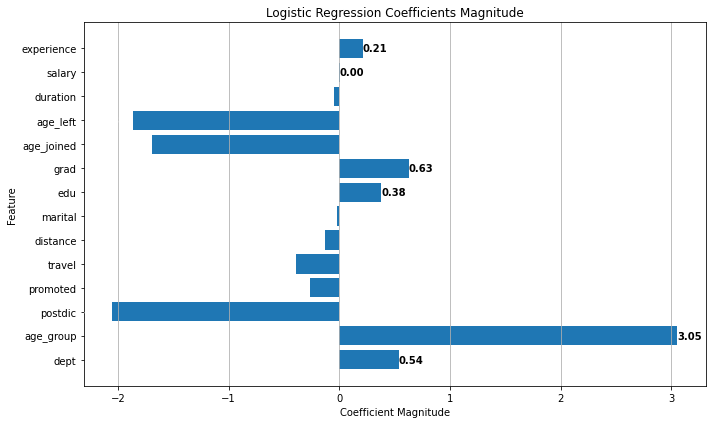

In [106]:
import matplotlib.pyplot as plt

# After fitting the model, get the best estimator from RandomizedSearchCV
best_logistic_model = rs_cv_classifier.best_estimator_

# Get the LogisticRegression step from the pipeline
logistic_model = best_logistic_model.named_steps['logistic']

# Get the coefficient magnitudes for each feature
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame with column names

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients Magnitude')
plt.grid(axis='x')
plt.tight_layout()

# Add labels to the bars
for index, value in enumerate(coefficients):
    if value >= 0:
        plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center', fontweight='bold')
    else:
        plt.text(value, index, f'{value:.2f}', color='white', ha='right', va='center', fontweight='bold')

plt.show()




Department:             0.150086034864009

**Age Group:**             **1.8024279165763017**

**POSTDIC SCORE 2022:**   **-1.8506382805444808**

Promoted:               -0.16574675640371356

Travel:                 -0.3181722831724002

Distance from Home:    -0.07538501817115205

Marital Status:         0.17849759510809998

Education Level:        0.35194615873327134

Local or Overseas Grad: 0.5119787585165763

Age Left:              -0.580178651928448

**Age Joined:**        **-1.5081012082279166**

Duration of Employment: 0.004373462417998281

Monthly Salary:         0.09024321465720443

Years of Experience:    0.0003747246492096025

In logistic regression, the model's coefficients represent the relationship between each feature and the target variable on the log-odds scale. The **larger the absolute value** of the coefficient, the **more important** the feature is. Positive coefficients indicate that an increase in the feature value increases the probability of the positive class, while negative coefficients imply that an increase in the feature value decreases the probability of the positive class.

Age Group = The older, the *more likely* to leave.

PostDic Score 2022 = The higher score one gets, *less likely* they will leave.

Age joined = The older the age, the *less likely* to leave.


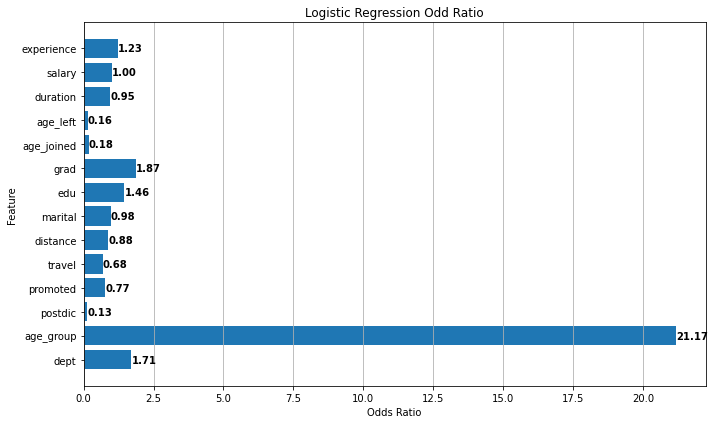

In [107]:
import matplotlib.pyplot as plt

# After fitting the model, get the best estimator from RandomizedSearchCV
best_logistic_model = rs_cv_classifier.best_estimator_

# Get the LogisticRegression step from the pipeline
logistic_model = best_logistic_model.named_steps['logistic']

# Get the coefficient magnitudes for each feature
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame with column names

odds_ratios = np.exp(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, odds_ratios)
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Logistic Regression Odd Ratio')
plt.grid(axis='x')
plt.tight_layout()

# Add labels to the bars
for index, value in enumerate(odds_ratios):
    if value >= 0:
        plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center', fontweight='bold')
    else:
        plt.text(value, index, f'{value:.2f}', color='white', ha='right', va='center', fontweight='bold')

plt.show()


In [108]:
import pickle

# Save the model to a file using pickle
with open('modelERv5.pkl', 'wb') as f:
    pickle.dump(rs_cv_classifier, f)


## SHAP explainability

In [109]:
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
explainer = shap.KernelExplainer(rs_cv_classifier.predict, X_train)
shap_values = explainer(X_test)

X does not have valid feature names, but StandardScaler was fitted with feature names
Using 168 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/42 [00:00<?, ?it/s]

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScale

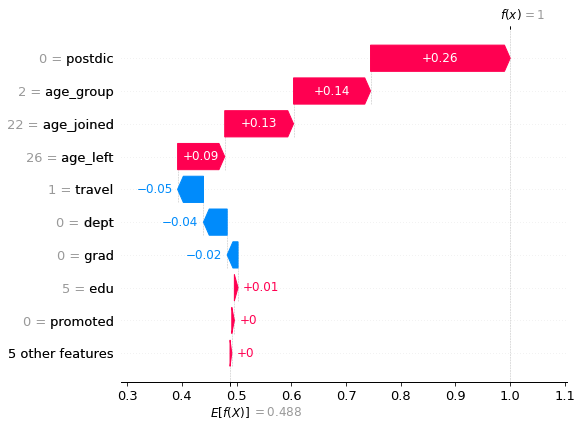

In [110]:
shap.plots.waterfall(shap_values[0])

In [111]:
shap.initjs()

shap.plots.force(shap_values[0])

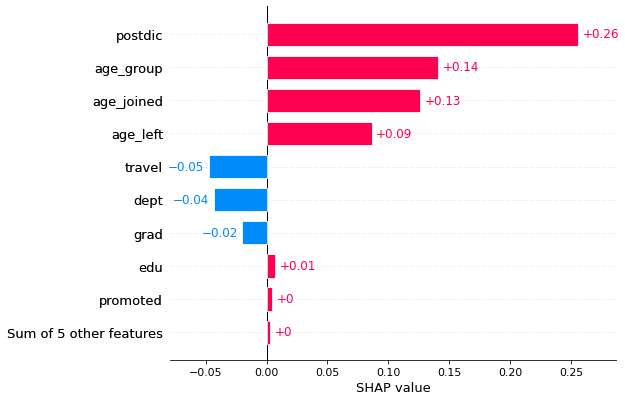

In [112]:
shap.plots.bar(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


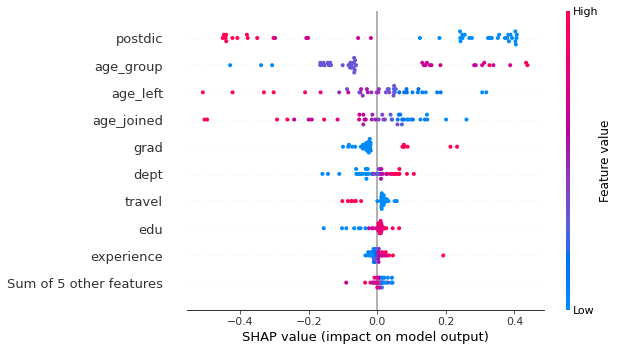

In [113]:
shap.plots.beeswarm(shap_values)